In [55]:
import matplotlib
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import numpy.ma as ma
%matplotlib inline

In [56]:
df =  pd.read_csv("../data/data.csv",index_col=0)

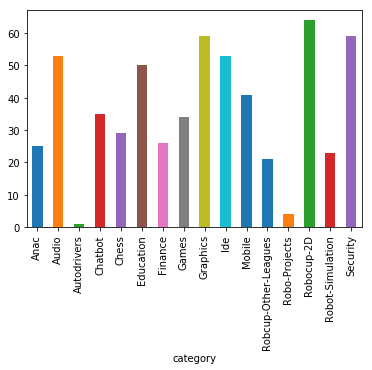

In [57]:
df.groupby('category').count()['type'].plot(kind='bar')

In [58]:
low = .01
high = .9816
quant_df = df['analizo_accm_mean'].quantile([low, high])
quant_df

1.00E-02   1.10E+00
9.82E-01   1.16E+01
Name: analizo_accm_mean, dtype: float64

In [59]:
df_reduced =df.loc[df['analizo_accm_mean']<=quant_df[high]].copy()


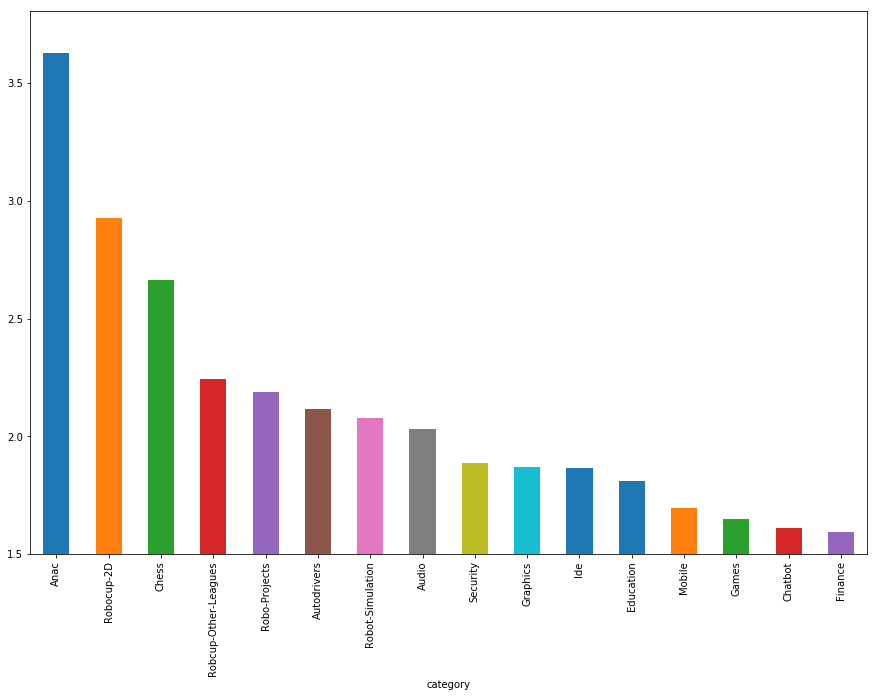

In [60]:

df_reduced.groupby('category').median()['analizo_accm_mean'].sort_values(ascending=False).plot(kind='bar',figsize=(15,10),)
plt.ylim(ymin=1.5)
plt.savefig('../fig/accm_dist.eps',dpi=1200,format='eps')

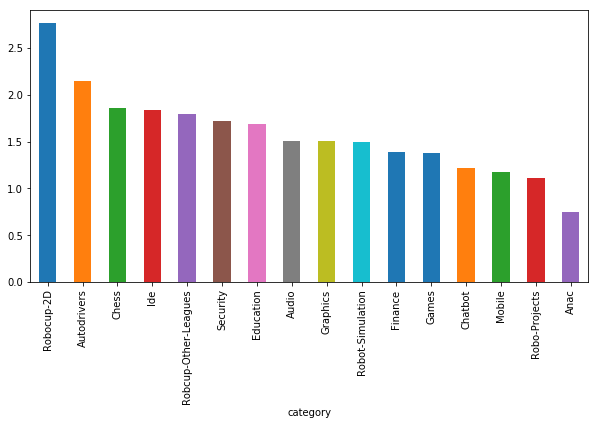

In [61]:
df_reduced.groupby('category').median()['analizo_acc_mean'].sort_values(ascending=False).plot(kind='bar',figsize=(10,5))

In [62]:
from scipy import stats
from operator import itemgetter

In [63]:
diff_vars = []
cat_lst = list(df_reduced[df_reduced['agent_type']=='agent']['category'].unique())
cat_lst.extend(df_reduced[df_reduced['agent_type']=='non-agent']['category'].unique())

In [64]:
variables = list(df_reduced.select_dtypes(include=[np.number]).columns)

In [75]:
diff_vars = {}
rep1= set()
for var in variables:
    ks_stats = []        
    
    for cat in cat_lst:
        rvs2 = df_reduced[(df_reduced['agent_type']=='non-agent')&(df_reduced['category']!=cat)][var]
        rvs1 = df_reduced[df_reduced['category']==cat][var]
        
        p = stats.ks_2samp(rvs1, rvs2)[1]
        if (p<0.005) and (rvs1.mean()>rvs2.mean()):
            ks_stats.append((cat,p))
        if len(ks_stats)>=3:
            
           
            cats , ps = zip(*ks_stats)
            rep1 |= set(cats)
            diff_vars[var] = [list(cats) ,sum(ps) / float(len(ps))]
            #sorted (ks_stats,key=itemgetter(1))
    

In [76]:
stat_df = pd.DataFrame.from_dict(diff_vars).transpose()
stat_df.columns = ['Repositories','p_value']
stat_df.p_value = stat_df.p_value.astype(float)
pd.set_option('display.float_format', '{:.2E}'.format)

In [77]:

stat_df.sort_values('p_value',inplace=True)

In [78]:
print(stat_df[0:15].to_latex())

\begin{tabular}{llr}
\toprule
{} &                                 Repositories &  p\_value \\
\midrule
analizo\_accm\_mean            &                    [Robocup-2D, Chess, Anac] & 1.12E-07 \\
analizo\_accm\_quantile\_upper  &                    [Robocup-2D, Chess, Anac] & 3.36E-06 \\
analizo\_accm\_quantile\_median &                    [Robocup-2D, Chess, Anac] & 3.31E-05 \\
analizo\_amloc\_quantile\_lower &                    [Robocup-2D, Chess, Anac] & 4.50E-05 \\
analizo\_total\_cof            &                    [Robocup-2D, Chess, Anac] & 8.60E-05 \\
analizo\_amloc\_quantile\_upper &  [Robocup-2D, Chess, Anac, Robot-Simulation] & 1.40E-04 \\
analizo\_loc\_quantile\_upper   &                    [Robocup-2D, Anac, Audio] & 2.47E-04 \\
analizo\_amloc\_mean           &  [Robocup-2D, Chess, Anac, Robot-Simulation] & 2.53E-04 \\
analizo\_mmloc\_quantile\_upper &         [Robocup-2D, Anac, Robot-Simulation] & 3.16E-04 \\
analizo\_rfc\_quantile\_upper   &                    [Robocup-

In [79]:
diff_v = {k[k.find('_')+1:]: [ 1 if r in v[0] else 0 for r in rep1] +[v[1]] for k,v in diff_vars.iteritems()}
diff_v

{'accm_mean': [0, 0, 1, 1, 0, 0, 1, 1.1167839440435343e-07],
 'accm_quantile_median': [0, 0, 1, 1, 0, 0, 1, 3.3056879877874624e-05],
 'accm_quantile_upper': [0, 0, 1, 1, 0, 0, 1, 3.359533813280645e-06],
 'accm_standard_deviation': [0, 0, 1, 1, 0, 0, 1, 0.0015626546153627555],
 'amloc_mean': [0, 1, 1, 1, 0, 0, 1, 0.0002534591286993718],
 'amloc_quantile_lower': [0, 0, 1, 1, 0, 0, 1, 4.4998362532483293e-05],
 'amloc_quantile_median': [0, 0, 1, 1, 0, 0, 1, 0.0014996311180128098],
 'amloc_quantile_upper': [0, 1, 1, 1, 0, 0, 1, 0.00014023992522864138],
 'anpm_quantile_lower': [0, 1, 1, 0, 1, 0, 1, 0.0016126675973139595],
 'lcom4_quantile_lower': [0, 0, 1, 0, 1, 0, 1, 0.0009462653516088467],
 'loc_mean': [1, 0, 1, 0, 1, 0, 1, 0.0006963918117587922],
 'loc_quantile_upper': [1, 0, 1, 0, 0, 0, 1, 0.00024719825118708726],
 'loc_standard_deviation': [0, 0, 1, 0, 1, 0, 1, 0.0009738481168740856],
 'mmloc_mean': [0, 1, 1, 0, 1, 0, 1, 0.001446303396804259],
 'mmloc_quantile_lower': [0, 0, 1, 1, 0, 0,

In [80]:
df =  pd.DataFrame.from_dict(diff_v,orient='index',columns=rep1|set(['p'])).sort_values('p')
df

,p,Ide,Robot-Simulation,Chess,Graphics,Robocup-2D,Audio,Anac
accm_quantile_median,0,0,1,1,0,0,1,3.31E-05
loc_standard_deviation,0,0,1,0,1,0,1,9.74E-04
lcom4_quantile_lower,0,0,1,0,1,0,1,9.46E-04
accm_standard_deviation,0,0,1,1,0,0,1,1.56E-03
rfc_mean,0,0,1,1,1,0,1,6.58E-04
accm_mean,0,0,1,1,0,0,1,1.12E-07
amloc_quantile_lower,0,0,1,1,0,0,1,4.50E-05
mmloc_quantile_lower,0,0,1,1,0,0,1,4.34E-04
anpm_quantile_lower,0,1,1,0,1,0,1,1.61E-03
noa_kurtosis,0,0,1,0,1,1,0,6.12E-04


In [81]:
print(df[0:10].to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  p &  Ide &  Robot-Simulation &  Chess &  Graphics &  Robocup-2D &  Audio &     Anac \\
\midrule
accm\_quantile\_median    &  0 &    0 &                 1 &      1 &         0 &           0 &      1 & 3.31E-05 \\
loc\_standard\_deviation  &  0 &    0 &                 1 &      0 &         1 &           0 &      1 & 9.74E-04 \\
lcom4\_quantile\_lower    &  0 &    0 &                 1 &      0 &         1 &           0 &      1 & 9.46E-04 \\
accm\_standard\_deviation &  0 &    0 &                 1 &      1 &         0 &           0 &      1 & 1.56E-03 \\
rfc\_mean                &  0 &    0 &                 1 &      1 &         1 &           0 &      1 & 6.58E-04 \\
accm\_mean               &  0 &    0 &                 1 &      1 &         0 &           0 &      1 & 1.12E-07 \\
amloc\_quantile\_lower    &  0 &    0 &                 1 &      1 &         0 &           0 &      1 & 4.50E-05 \\
mmloc\_quantile\_lower    &  0 &    0 &             

In [82]:
df_reduced['agent_cat'] = pd.Categorical(df_reduced['agent_type'],['agnet','Robot','non-agent'])
df_reduced.sort_values('agent_cat',inplace=True)

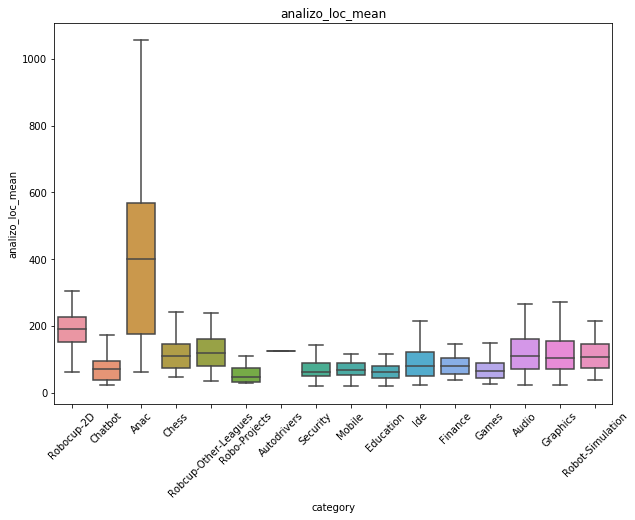

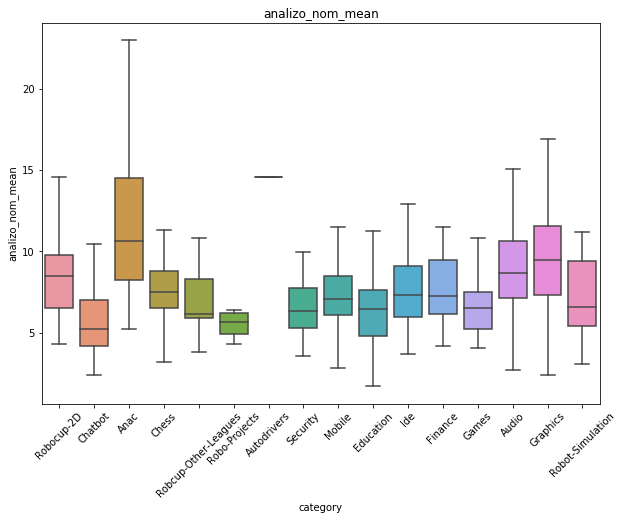

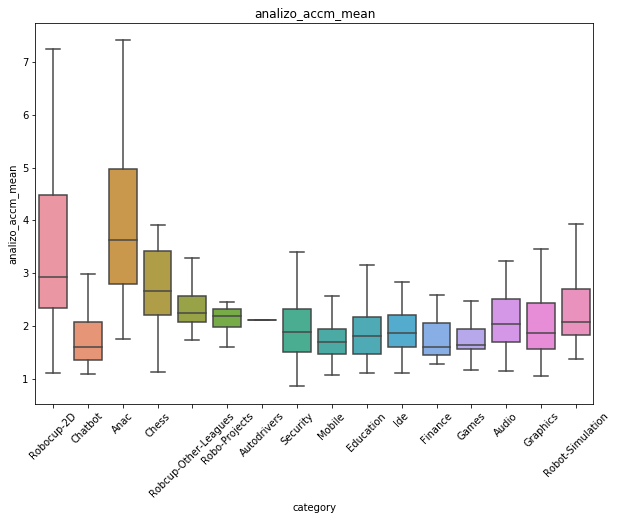

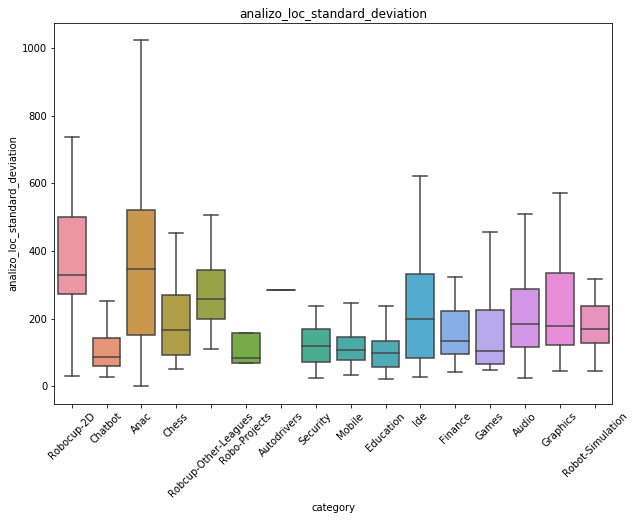

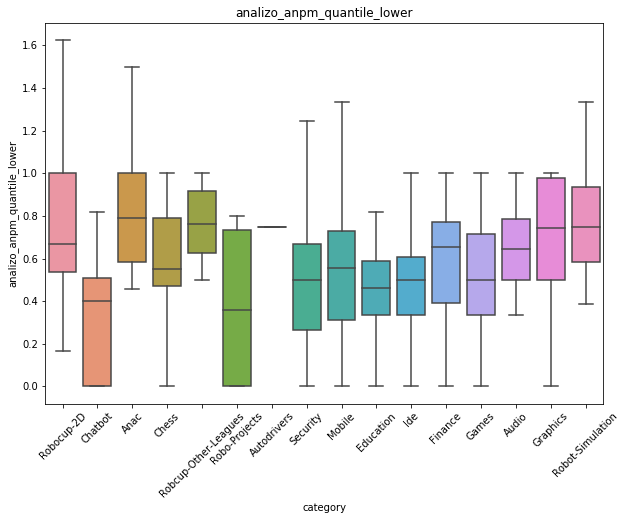

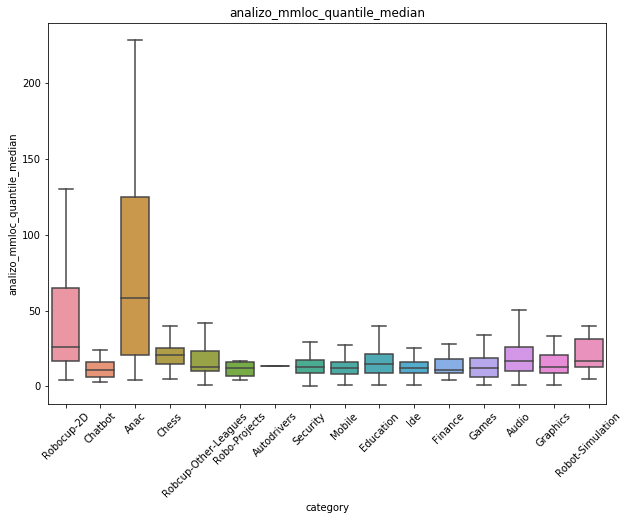

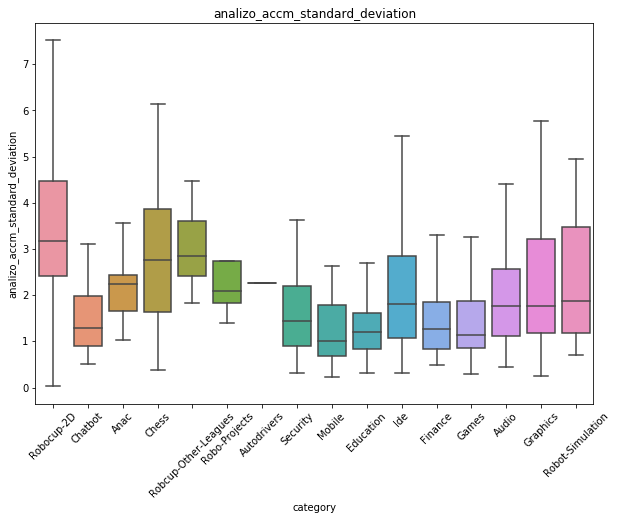

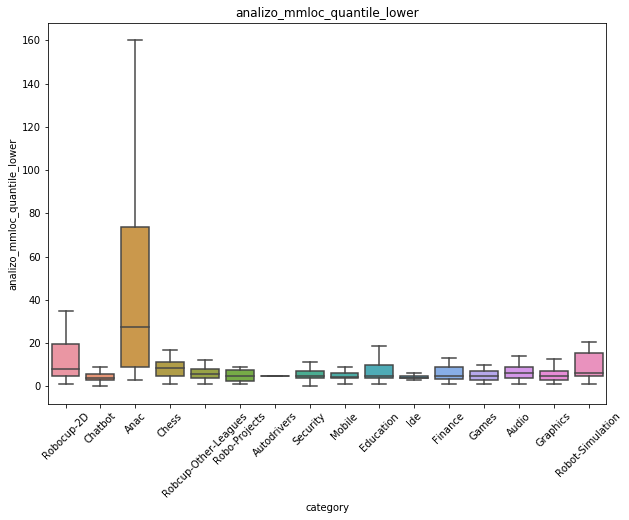

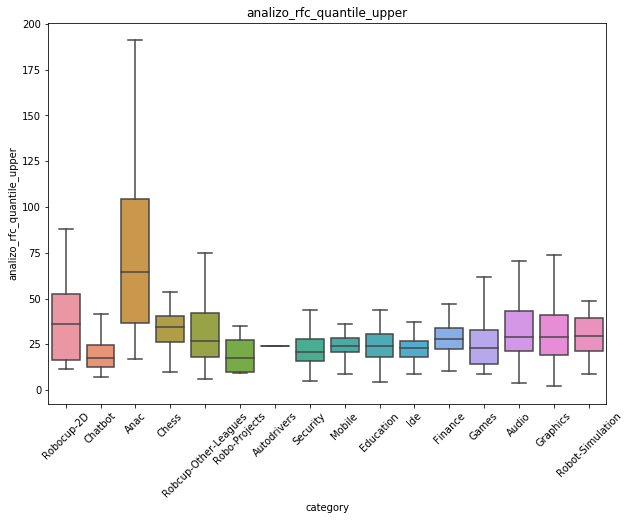

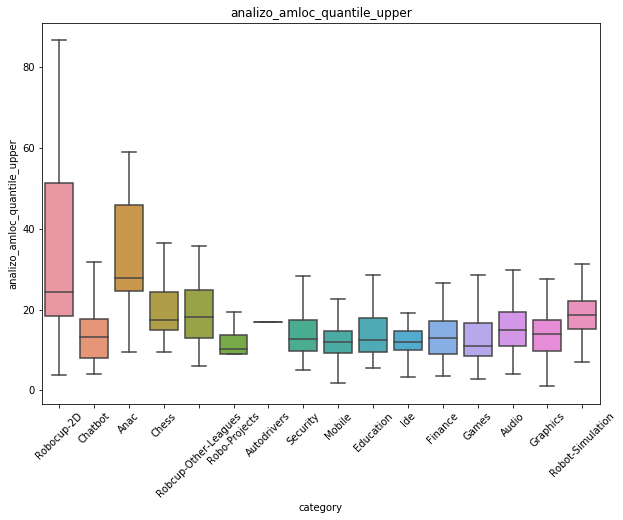

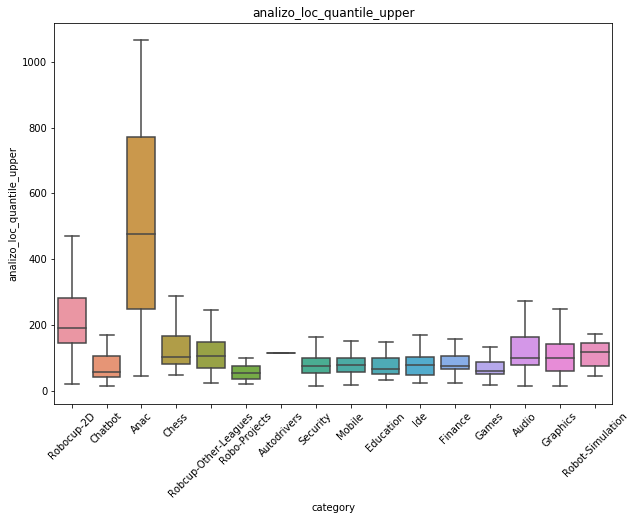

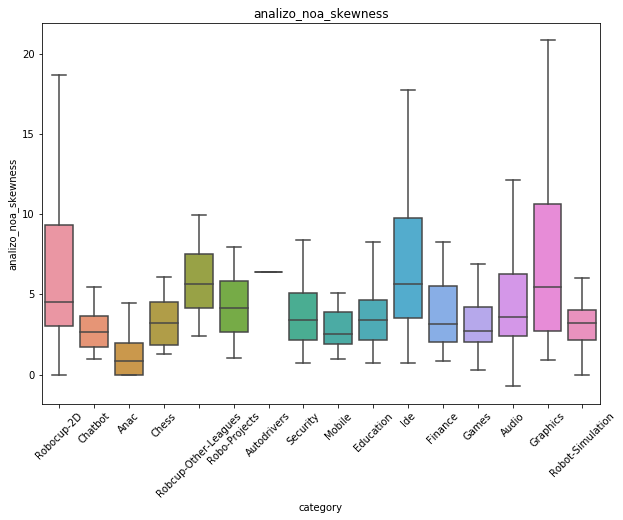

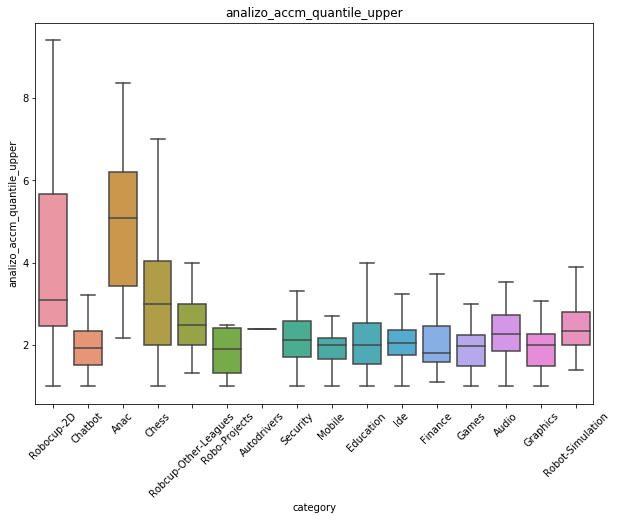

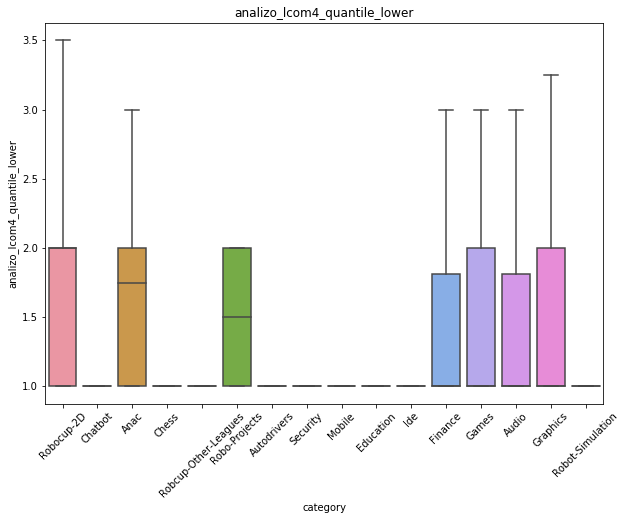

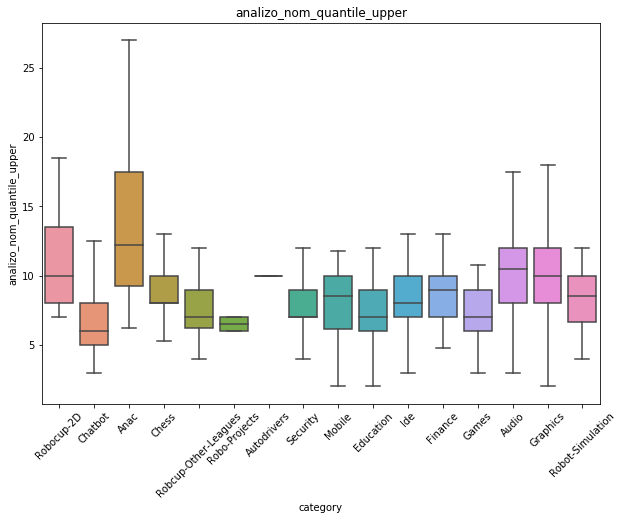

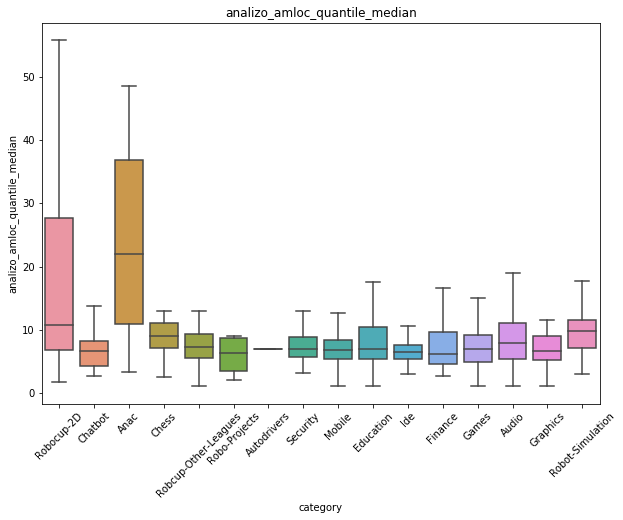

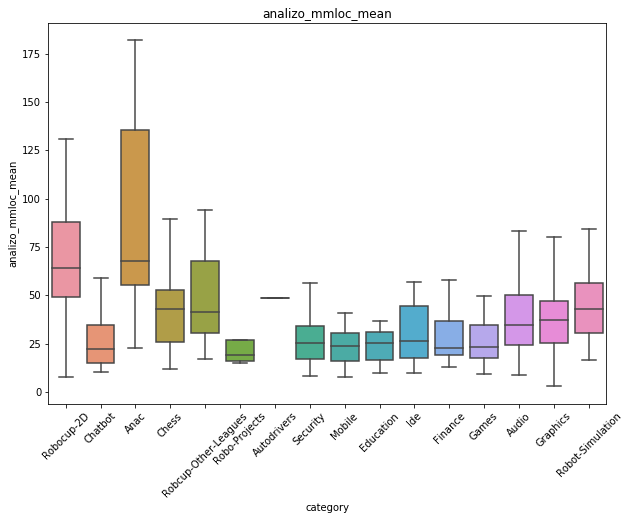

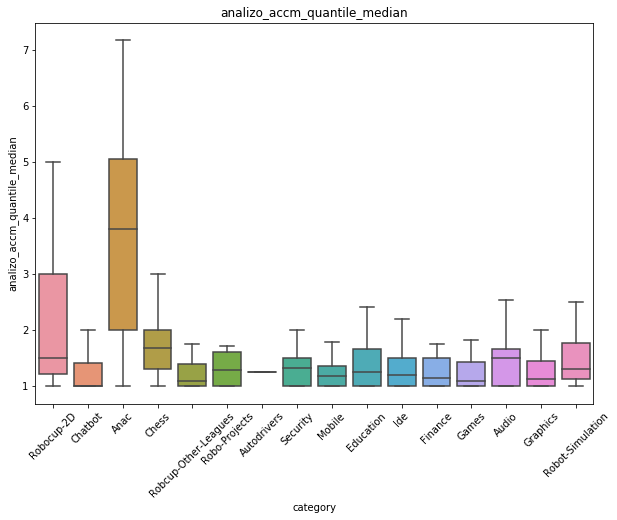

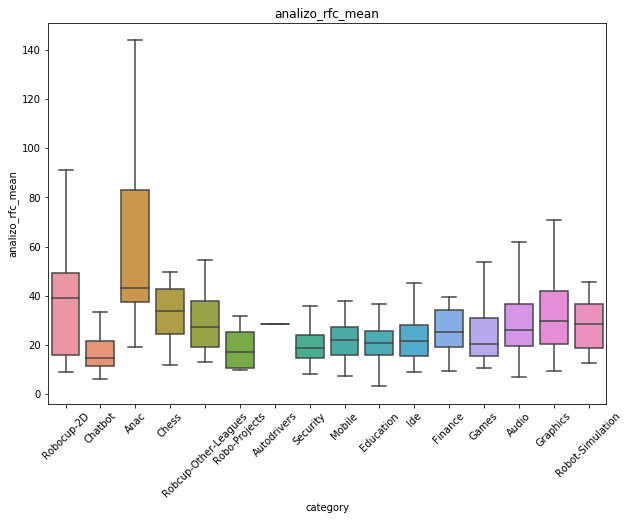

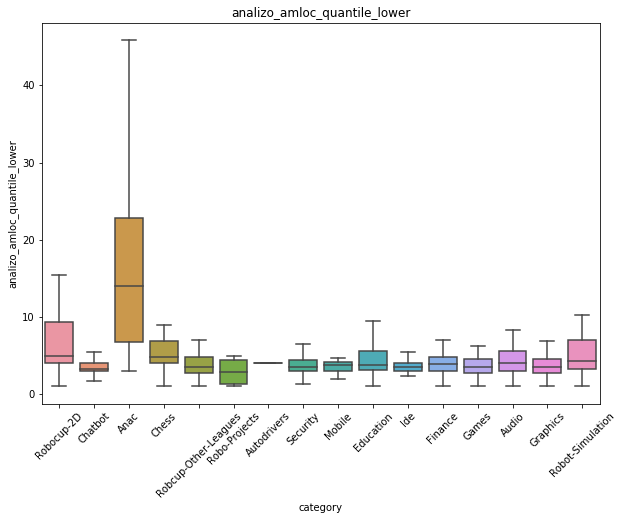

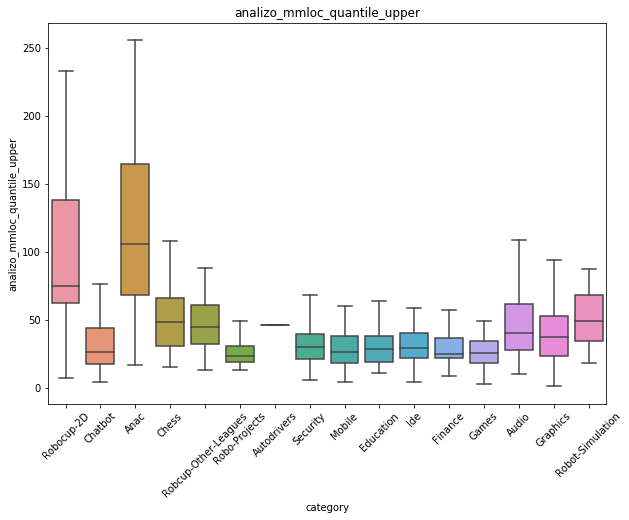

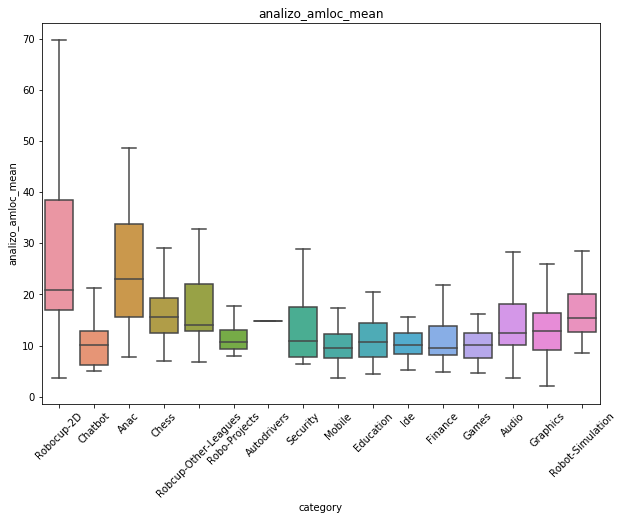

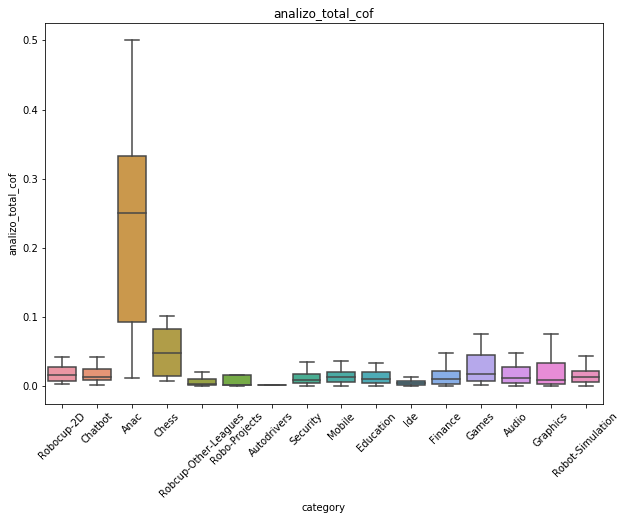

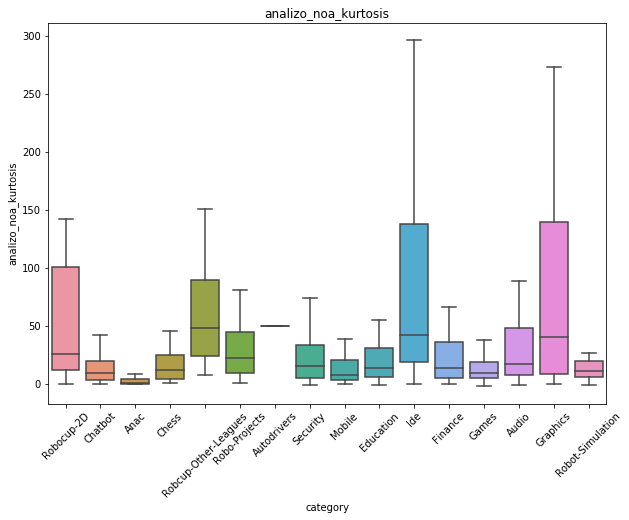

In [84]:
for var in diff_vars:
    
    fix,ax = plt.subplots(figsize=(10,7),)
    sns.boxplot(x='category',y=var,data=df_reduced,showfliers=False).set_title(var)
    #g = sns.swarmplot(x='category',y=var,data=df_reduced,color='black')
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.savefig('../fig/box_plot_category_vs_metric%s.eps'%var,dpi=1200,format='eps')
    plt.show()
            

IOError: [Errno 2] No such file or directory: 'fig/analizo_loc_mean_output.eps'

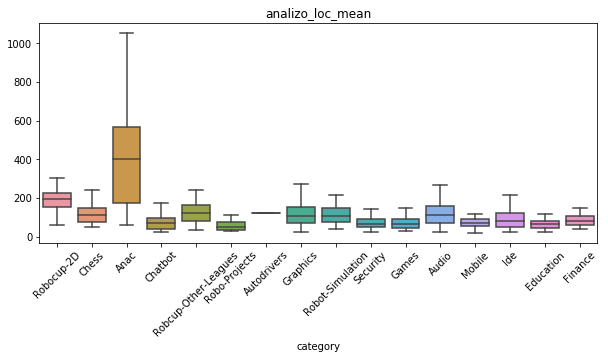

In [74]:
for var in [c for c in diff_vars if 'mean'  in c]:
    
    fix,ax = plt.subplots(figsize=(10,5),)
    sns.boxplot(ax=ax , x='category',y=var,data=df_reduced,showfliers=False).set_title(var)
    plt.gcf().subplots_adjust(bottom=0.27)
    #g = sns.swarmplot(x='category',y=var,data=df_reduced,color='black')
    plt.setp(ax.get_xticklabels(), rotation=45)
    
    x_axis = ax.axes.get_yaxis()
    x_axis.set_label_text('foo')
    x_label = x_axis.get_label()
    ##print isinstance(x_label, matplotlib.artist.Artist)
    x_label.set_visible(False)
    plt.savefig('fig/'+var+"_output.eps",dpi=1200,format='eps')


In [ ]:
features = ["analizo_lcom4_mean",'analizo_sc_mean','analizo_cbo_mean','analizo_amloc_quantile_lower']


for var in features:
    
    fix,ax = plt.subplots(figsize=(10,5),)
    sns.boxplot(ax=ax , x='category',y=var,data=df_reduced,showfliers=False)
    plt.gcf().subplots_adjust(bottom=0.27)
    #g = sns.swarmplot(x='category',y=var,data=df_reduced,color='black')
    plt.setp(ax.get_xticklabels(), rotation=45)
    
    x_axis = ax.axes.get_yaxis()
    x_axis.set_label_text('foo')
    x_label = x_axis.get_label()
    ##print isinstance(x_label, matplotlib.artist.Artist)
    x_label.set_visible(False)
    plt.savefig('fig/'+var+"_output.eps",dpi=1200,format='eps')



In [ ]:
df2 =  pd.read_csv(os.getcwd() +"/data/robo-sim-data.csv",index_col=0)

In [ ]:
df2 = df2[~df2['McCabes_cyclomatic_complexity'].isnull()].copy()

In [30]:
df2['cc_per_line_of_code'] = df2['McCabes_cyclomatic_complexity'] / df2['analizo_total_loc']

KeyError: 'McCabes_cyclomatic_complexity'

In [31]:
df2['McCabes_cyclomatic_complexity'].hist(range=(0,2500))

KeyError: 'McCabes_cyclomatic_complexity'

In [32]:
df2.plot.scatter(x='analizo_accm_mean',y='cc_per_line_of_code' )
plt.ylim(0,1)

KeyError: 'cc_per_line_of_code'